# Rock Paper Scissors

In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
import numpy as np
import platform
import datetime
import os

print('Python version:', platform.python_version())
print('Tensorflow version:', tf.__version__)
print('Keras version:', tf.keras.__version__)

Python version: 3.7.6
Tensorflow version: 2.1.0
Keras version: 2.2.4-tf


## Loading the dataset

In [2]:
# See available datasets
tfds.list_builders()

['abstract_reasoning',
 'aeslc',
 'aflw2k3d',
 'amazon_us_reviews',
 'arc',
 'bair_robot_pushing_small',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'cos_e',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'deep_weeds',
 'definite_pronoun_resolution',
 'diabetic_retinopathy_detection',
 'dmlab',
 'downsampled_imagenet',
 'dsprites',
 'dtd',
 'duke_ultrasound',
 'dummy_dataset_shared_generator',
 'dummy_mnist',
 'emnist',
 'esnli',
 'eurosat',
 'fashion_mnist',
 'flic',
 'flores',
 'food101',
 'gap',
 'gigaword',
 'glue',
 'groove',
 'higgs',
 'horses_or_humans',
 'i_natura

In [3]:
(dataset_train_raw, dataset_test_raw), dataset_info = tfds.load(
    name='rock_paper_scissors',
    data_dir='.tmp',
    with_info=True,
    as_supervised=True,
    split=[tfds.Split.TRAIN, tfds.Split.TEST],
)

In [4]:
print('Raw train dataset:', dataset_train_raw)
print('Raw train dataset size:', len(list(dataset_train_raw)), '\n')

print('Raw test dataset:', dataset_test_raw)
print('Raw test dataset size:', len(list(dataset_test_raw)), '\n')

Raw train dataset: <DatasetV1Adapter shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>
Raw train dataset size: 2520 

Raw test dataset: <DatasetV1Adapter shapes: ((300, 300, 3), ()), types: (tf.uint8, tf.int64)>
Raw test dataset size: 372 



In [5]:
dataset_info

tfds.core.DatasetInfo(
    name='rock_paper_scissors',
    version=3.0.0,
    description='Images of hands playing rock, paper, scissor game.',
    homepage='http://laurencemoroney.com/rock-paper-scissors-dataset',
    features=FeaturesDict({
        'image': Image(shape=(300, 300, 3), dtype=tf.uint8),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=3),
    }),
    total_num_examples=2892,
    splits={
        'test': 372,
        'train': 2520,
    },
    supervised_keys=('image', 'label'),
    citation="""@ONLINE {rps,
    author = "Laurence Moroney",
    title = "Rock, Paper, Scissors Dataset",
    month = "feb",
    year = "2019",
    url = "http://laurencemoroney.com/rock-paper-scissors-dataset"
    }""",
    redistribution_info=,
)

In [6]:
NUM_TRAIN_EXAMPLES = dataset_info.splits['train'].num_examples
NUM_TEST_EXAMPLES = dataset_info.splits['test'].num_examples

print('Number of TRAIN examples:', NUM_TRAIN_EXAMPLES);
print('Number of TEST examples:', NUM_TEST_EXAMPLES);

Number of TRAIN examples: 2520
Number of TEST examples: 372


In [7]:
INPUT_IMG_SHAPE = dataset_info.features['image'].shape
INPUT_IMG_SIZE = dataset_info.features['image'].shape[0]

print('Input image shape:', INPUT_IMG_SHAPE)
print('Input image size:', INPUT_IMG_SIZE)

Input image shape: (300, 300, 3)
Input image size: 300


In [8]:
NUM_CLASSES = dataset_info.features['label'].num_classes

print('Number of label classes:', NUM_CLASSES)

Number of label classes: 3


In [9]:
get_label_name = dataset_info.features['label'].int2str

In [10]:
print(get_label_name(0));
print(get_label_name(1));
print(get_label_name(2));

rock
paper
scissors


## Exploring the dataset

In [11]:
def preview_dataset(dataset):
    plt.figure(figsize=(16, 12))
    plot_index = 0
    for features in dataset.take(12):
        (image, label) = features
        plot_index += 1
        plt.subplot(3, 4, plot_index)
        # plt.axis('Off')
        label = get_label_name(label.numpy())
        plt.title('Label: %s' % label)
        plt.imshow(image.numpy())

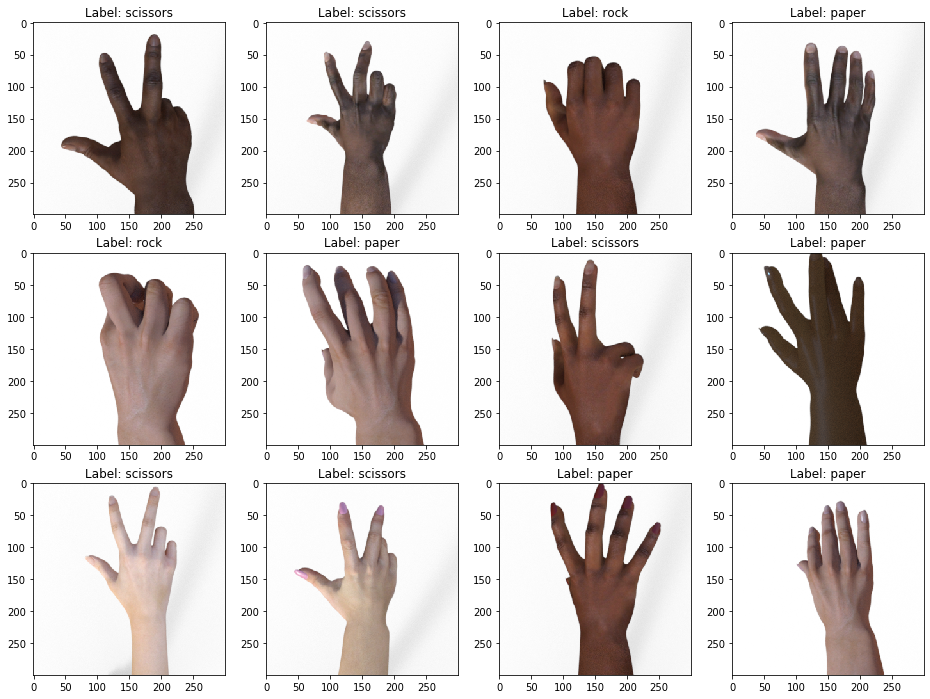

In [12]:
# Explore raw training dataset images.
preview_dataset(dataset_train_raw)

In [13]:
# Explore what values are used to represent the image. 
(first_image, first_lable) = list(dataset_train_raw.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (300, 300, 3) 

[[[254 254 254]
  [253 253 253]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [250 250 250]]

 [[254 254 254]
  [254 254 254]
  [253 253 253]
  ...
  [250 250 250]
  [251 251 251]
  [249 249 249]]

 [[254 254 254]
  [254 254 254]
  [254 254 254]
  ...
  [251 251 251]
  [250 250 250]
  [252 252 252]]

 ...

 [[252 252 252]
  [251 251 251]
  [252 252 252]
  ...
  [247 247 247]
  [249 249 249]
  [248 248 248]]

 [[253 253 253]
  [253 253 253]
  [251 251 251]
  ...
  [248 248 248]
  [248 248 248]
  [248 248 248]]

 [[252 252 252]
  [253 253 253]
  [252 252 252]
  ...
  [248 248 248]
  [247 247 247]
  [250 250 250]]]


## Pre-processing the dataset

In [14]:
def format_example(image, label):
    # Make image color values to be float.
    image = tf.cast(image, tf.float32)
    # Make image color values to be in [0..1] range.
    image = image / 255.
    # Make sure that image has a right size
    image = tf.image.resize(image, [INPUT_IMG_SIZE, INPUT_IMG_SIZE])
    return image, label

In [15]:
dataset_train = dataset_train_raw.map(format_example)
dataset_test = dataset_test_raw.map(format_example)

In [16]:
# Explore what values are used to represent the image. 
(first_image, first_lable) = list(dataset_train.take(1))[0]
print('Label:', first_lable.numpy(), '\n')
print('Image shape:', first_image.numpy().shape, '\n')
print(first_image.numpy())

Label: 2 

Image shape: (300, 300, 3) 

[[[0.99607843 0.99607843 0.99607843]
  [0.99215686 0.99215686 0.99215686]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]
  [0.98039216 0.98039216 0.98039216]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99215686 0.99215686 0.99215686]
  ...
  [0.98039216 0.98039216 0.98039216]
  [0.9843137  0.9843137  0.9843137 ]
  [0.9764706  0.9764706  0.9764706 ]]

 [[0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  [0.99607843 0.99607843 0.99607843]
  ...
  [0.9843137  0.9843137  0.9843137 ]
  [0.98039216 0.98039216 0.98039216]
  [0.9882353  0.9882353  0.9882353 ]]

 ...

 [[0.9882353  0.9882353  0.9882353 ]
  [0.9843137  0.9843137  0.9843137 ]
  [0.9882353  0.9882353  0.9882353 ]
  ...
  [0.96862745 0.96862745 0.96862745]
  [0.9764706  0.9764706  0.9764706 ]
  [0.972549   0.972549   0.972549  ]]

 [[0.99215686 0.99215686 0.9921568

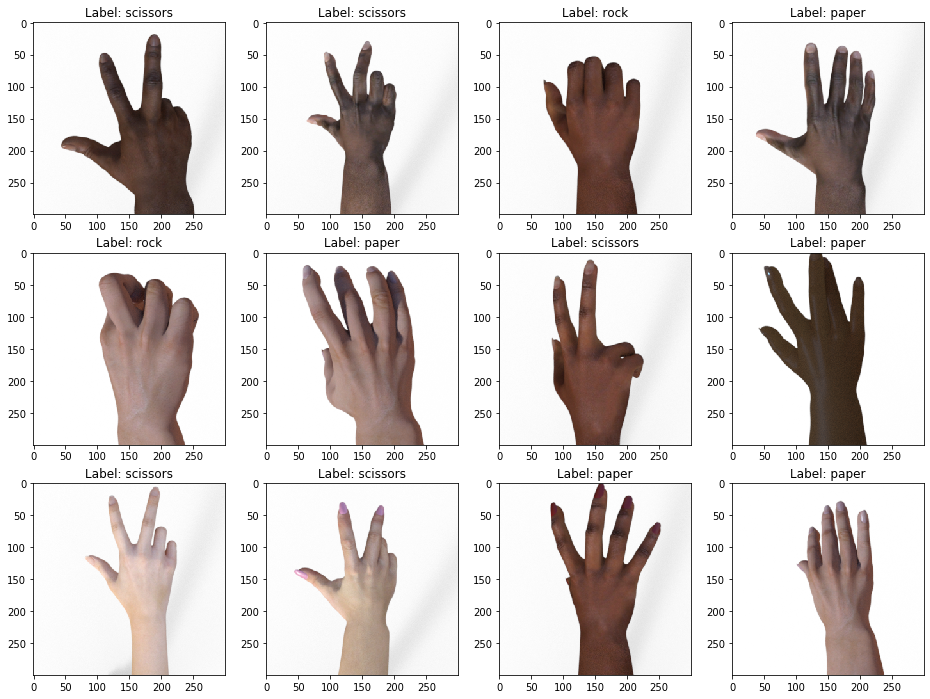

In [17]:
# Explore preprocessed training dataset images.
preview_dataset(dataset_train)

## Data augmentation

In [18]:
def augment_data(image, label):
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_flip_up_down(image)
    image = tf.image.random_contrast(image, lower=0.5, upper=1.0)
    image = tf.image.random_saturation(image, lower=0.5, upper=1.0)
    return image, label

In [19]:
dataset_train_augmented = dataset_train.map(augment_data)

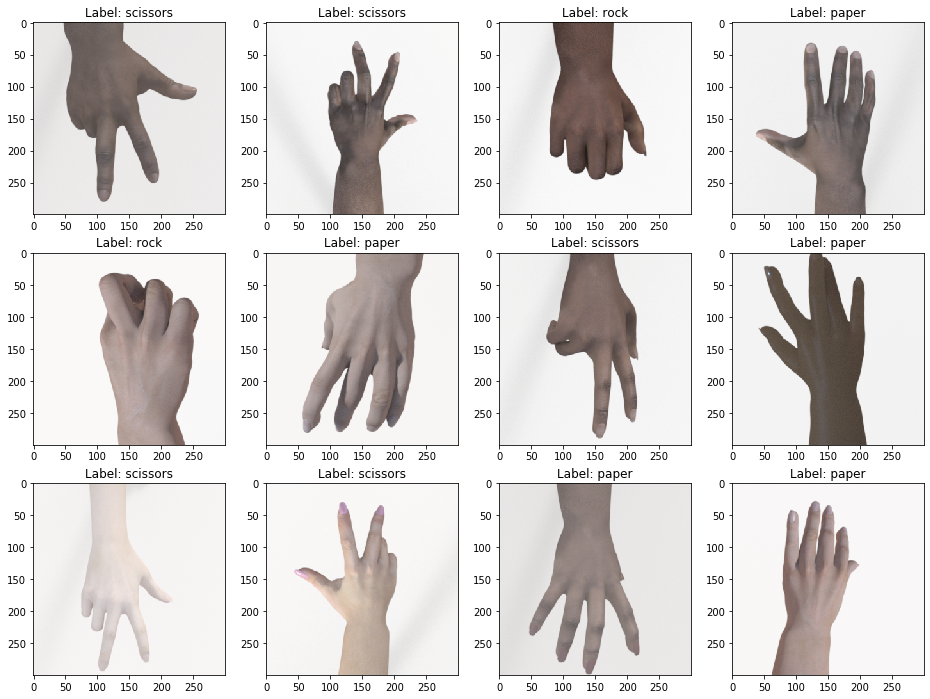

In [20]:
# Explore augmented training dataset.
preview_dataset(dataset_train_augmented)

## Data shuffling and batching

In [21]:
BATCH_SIZE = 32

dataset_train_augmented_shuffled = dataset_train_augmented.shuffle(
    buffer_size=NUM_TRAIN_EXAMPLES
)

dataset_train_augmented_shuffled = dataset_train_augmented.batch(
    batch_size=BATCH_SIZE
)

# Prefetch will enable the input pipeline to asynchronously fetch batches while your model is training.
dataset_train_augmented_shuffled = dataset_train_augmented_shuffled.prefetch(
    buffer_size=tf.data.experimental.AUTOTUNE
)

dataset_test_shuffled = dataset_test.batch(BATCH_SIZE)

In [22]:
print(dataset_train_augmented_shuffled)
print(dataset_test_shuffled)

<DatasetV1Adapter shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>
<DatasetV1Adapter shapes: ((None, 300, 300, 3), (None,)), types: (tf.float32, tf.int64)>


Label batch shape: (32,) 

Image batch shape: (32, 300, 300, 3) 

Label batch: [2 2 0 1 0 1 2 1 2 2 1 1 2 1 1 1 1 1 1 1 1 0 0 0 0 1 1 2 2 2 0 0] 

First batch image: [[[0.9082221  0.9009226  0.8984254 ]
  [0.90591365 0.89861417 0.896117  ]
  [0.9082221  0.9009226  0.8984254 ]
  ...
  [0.9012969  0.89399743 0.89150023]
  [0.8989885  0.89168906 0.88919187]
  [0.8989885  0.89168906 0.88919187]]

 [[0.9082221  0.9009226  0.8984254 ]
  [0.9082221  0.9009226  0.8984254 ]
  [0.90591365 0.89861417 0.896117  ]
  ...
  [0.8989885  0.89168906 0.88919187]
  [0.9012969  0.89399743 0.89150023]
  [0.8966801  0.88938063 0.88688344]]

 [[0.9082221  0.9009226  0.8984254 ]
  [0.9082221  0.9009226  0.8984254 ]
  [0.9082221  0.9009226  0.8984254 ]
  ...
  [0.9012969  0.89399743 0.89150023]
  [0.8989885  0.89168906 0.88919187]
  [0.9036053  0.8963058  0.8938086 ]]

 ...

 [[0.9036053  0.8963058  0.8938086 ]
  [0.9012969  0.89399743 0.89150023]
  [0.9036053  0.8963058  0.8938086 ]
  ...
  [0.8920633  0.88476

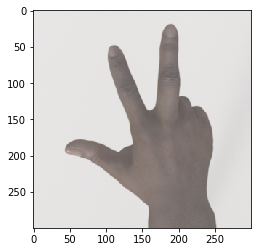

In [23]:
# Debugging the batches using conversion to Numpy arrays.
batches = tfds.as_numpy(dataset_train_augmented_shuffled)
for batch in batches:
    image_batch, label_batch = batch
    print('Label batch shape:', label_batch.shape, '\n')
    print('Image batch shape:', image_batch.shape, '\n')
    print('Label batch:', label_batch, '\n')
    
    for batch_item_index in range(len(image_batch)):
        print('First batch image:', image_batch[batch_item_index], '\n')
        plt.imshow(image_batch[batch_item_index])
        plt.show()
        # Break to shorten the output.
        break
    # Break to shorten the output.
    break

## Creating the model

In [24]:
model = tf.keras.models.Sequential()

# First convolution.
model.add(tf.keras.layers.Convolution2D(
    input_shape=INPUT_IMG_SHAPE,
    filters=32,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Second convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Third convolution.
model.add(tf.keras.layers.Convolution2D(
    filters=64,
    kernel_size=3,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.MaxPooling2D(
    pool_size=(2, 2),
    strides=(2, 2)
))

# Flatten the results to feed into DNN.
model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dropout(0.5))

# 64 neuron hidden layer
model.add(tf.keras.layers.Dense(
    units=64,
    activation=tf.keras.activations.relu
))
model.add(tf.keras.layers.Dense(
    units=NUM_CLASSES,
    activation=tf.keras.activations.softmax
))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

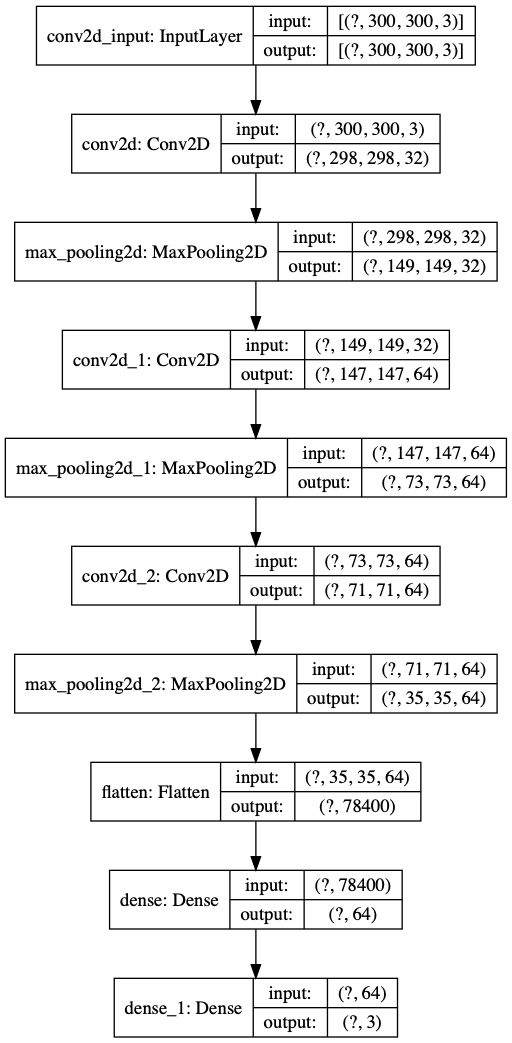

In [26]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

## Compiling the model

In [27]:
adam_optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
# rmsprop_optimizer = tf.keras.optimizers.RMSprop()

model.compile(
    optimizer=adam_optimizer,
    loss=tf.keras.losses.sparse_categorical_crossentropy,
    metrics=['accuracy']
)

## Training the model

In [28]:
steps_per_epoch = NUM_TRAIN_EXAMPLES // BATCH_SIZE
validation_steps = NUM_TEST_EXAMPLES // BATCH_SIZE

print('steps_per_epoch:', steps_per_epoch)
print('validation_steps:', validation_steps)

steps_per_epoch: 78
validation_steps: 11


In [29]:
# Preparing callbacks.
os.makedirs('.logs/fit', exist_ok=True)
tensorboard_log_dir = '.logs/fit' + datetime.datetime.now().strftime('%Y%m%d-%H%M%S')
tensorboard_callback = tf.keras.callbacks.TensorBoard(
    log_dir=tensorboard_log_dir,
    histogram_freq=1
)

os.makedirs('.tmp/checkpoints', exist_ok=True)
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='.tmp/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5'
)

early_stopping_callback = tf.keras.callbacks.EarlyStopping(
    patience=5
)

In [ ]:
training_history = model.fit(
    x=dataset_train_augmented_shuffled.repeat(),
    epochs=5,
    validation_data=dataset_test_shuffled.repeat(),
    steps_per_epoch=steps_per_epoch,
    validation_steps=validation_steps,
    callbacks=[tensorboard_callback, model_checkpoint_callback, early_stopping_callback]
)

## Creating a model

In [ ]:
model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Conv2D())

# Combined version

http://www.laurencemoroney.com/rock-paper-scissors-dataset/

https://colab.research.google.com/github/lmoroney/dlaicourse/blob/master/Course%202%20-%20Part%208%20-%20Lesson%202%20-%20Notebook%20(RockPaperScissors).ipynb#scrollTo=ZABJp7T3VLCU

In [ ]:
dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3, 4, 5, 6])
dataset = dataset.shuffle(5).batch(2)
list(dataset)

In [ ]:
history_2 = model.fit_generator(
    dataset['train'],
    epochs=5,
    validation_data = dataset['test'],
    verbose = 1
)

# Laurence version

In [ ]:
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps.zip -o .tmp/rps.zip
!curl https://storage.googleapis.com/laurencemoroney-blog.appspot.com/rps-test-set.zip -o .tmp/rps-test-set.zip

In [ ]:
import os
import zipfile

local_zip = '.tmp/rps.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.tmp/')
zip_ref.close()

local_zip = '.tmp/rps-test-set.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('.tmp/')
zip_ref.close()

In [ ]:
rock_dir = os.path.join('.tmp/rps/rock')
paper_dir = os.path.join('.tmp/rps/paper')
scissors_dir = os.path.join('.tmp/rps/scissors')

print('total training rock images:', len(os.listdir(rock_dir)), '\n')
print('total training paper images:', len(os.listdir(paper_dir)), '\n')
print('total training scissors images:', len(os.listdir(scissors_dir)), '\n')

rock_files = os.listdir(rock_dir)
print(rock_files[:10], '\n')

paper_files = os.listdir(paper_dir)
print(paper_files[:10], '\n')

scissors_files = os.listdir(scissors_dir)
print(scissors_files[:10])

In [ ]:
import matplotlib.image as mpimg

pic_index = 2

next_rock = [os.path.join(rock_dir, fname) for fname in rock_files[pic_index-2:pic_index]]
next_paper = [os.path.join(paper_dir, fname) for fname in paper_files[pic_index-2:pic_index]]
next_scissors = [os.path.join(scissors_dir, fname) for fname in scissors_files[pic_index-2:pic_index]]

for i, img_path in enumerate(next_rock + next_paper + next_scissors):
    # print(img_path)
    img = mpimg.imread(img_path)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [ ]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

TRAINING_DIR = '.tmp/rps/'
training_datagen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

VALIDATION_DIR = ".tmp/rps-test-set/"
validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150,150),
    class_mode='categorical'
)

In [ ]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 150x150 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.summary()

In [ ]:
tf.keras.utils.plot_model(
    model,
    show_shapes=True,
    show_layer_names=True,
)

In [ ]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer='rmsprop',
    metrics=['accuracy']
)

In [ ]:
history = model.fit_generator(
    train_generator,
    epochs=5,
    validation_data = validation_generator,
    verbose = 1
)

In [ ]:
model.save('rps.h5')

In [ ]:
history.params

In [ ]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))

plt.plot(epochs, accuracy, 'r', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.show()